In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#import warnings
#warnings.filterwarnings('ignore')

#DT 시각화를 위해 dt_clf 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [9]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot (graphvize가 읽어드릴 수 있는) 파일을 생성함.
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,\
    feature_names = iris_data.feature_names, impurity=True, filled=True)

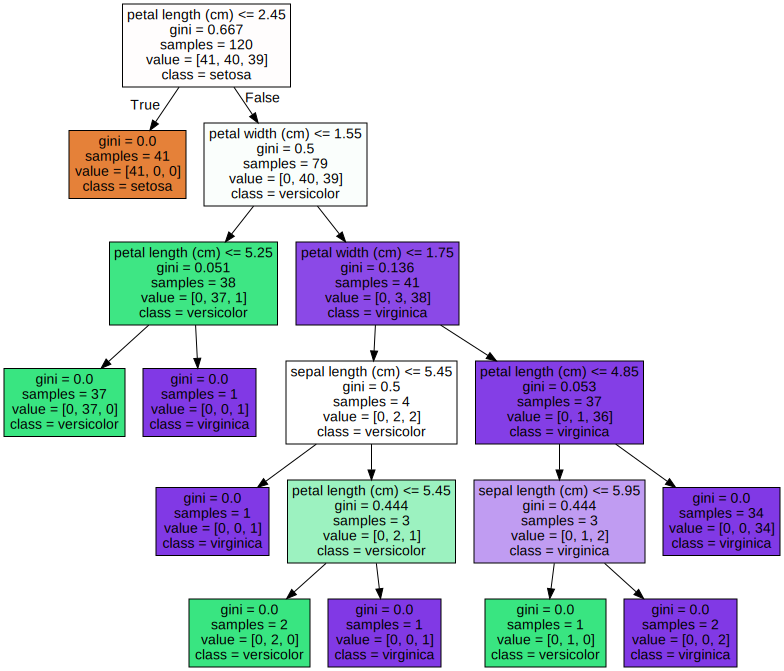

In [10]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


feature importance 시각화

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

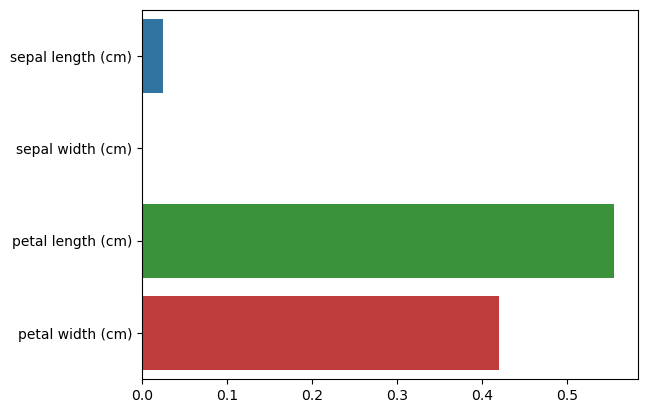

In [13]:
import seaborn as sns
import numpy as np

#feature importance 추출
print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_,3)))

for name , value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{} : {:.3f}'.format(name,value))

# feaute importance를 칼럼별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

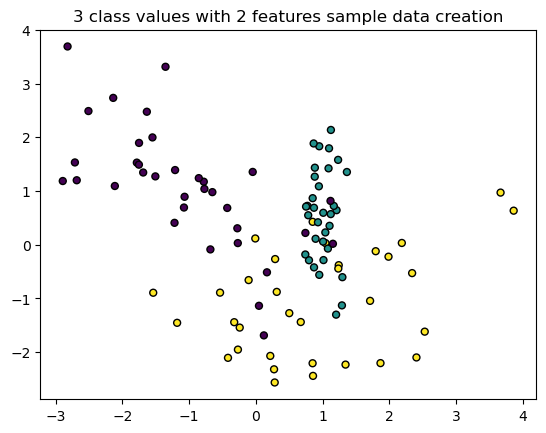

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 class values with 2 features sample data creation')

#make_classification함수를 통한 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [135]:
import numpy as np
#  Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig , ax = plt.subplots()
    
    #학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim = (y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_red = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,ylim_end,num=200), 
                         np.linspace(ylim_start,ylim_end,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    #ax.scatter(xx,yy,c=Z,s=25)
    
    #contourf() 를 이용하여 class boundary를 visualization
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy, Z , alpha=0.5,
                           levels = np.arange(n_classes+1)-0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder = 1)
    
    
    

/var/folders/d5/28cm20750499kzvbcrh0z1g00000gn/T/ipykernel_60148/3288510102.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy, Z , alpha=0.5,


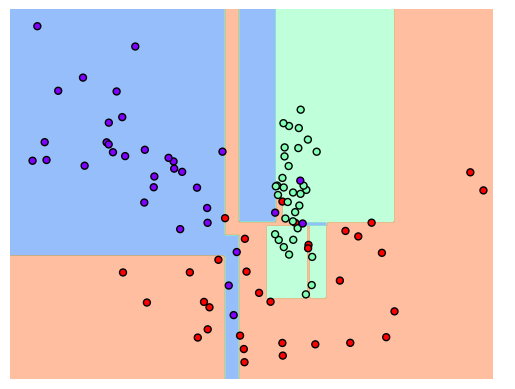

In [136]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)



## Human Acitivity Recognition Data Set

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv('/Users/b12/Desktop/dailystudycode/data/UCI HAR Dataset/features.txt', sep='\s+',
                              header=None, names = ['column_index', 'column_name'])

feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [157]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df.value_counts()

column_index
1               435
3                42
dtype: int64

In [160]:
feature_dup_df[feature_dup_df['column_index']>1]

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [173]:
feature_name_df.groupby('column_name').cumcount().value_counts() #중복세기

0    477
1     42
2     42
dtype: int64

In [194]:
# 중복 칼럼 제거
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']]\
        .apply(lambda x : x[0] + '_'+str(x[1]) if x[1]>0 else x[0], axis=1)   # 칼럼에 대한 조건부 , axis=1(column이 증가하는방향,row방향 적용)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)   
    
    return new_feature_name_df

In [197]:
def get_human_dataset():
    
    feature_name_df = pd.read_csv('/Users/b12/Desktop/dailystudycode/data/UCI HAR Dataset/features.txt', sep='\s+',
                                  header=None, names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피쳐 데이터세트와 테스트 피쳐 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('../data/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('../data/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('../data/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('../data/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test , y_train, y_test

In [198]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [200]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [202]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('트리의 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

트리의 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [205]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24],
          'min_samples_split' : [16]
          }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [208]:
# grid search cv결과 표시
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']] #리스트를   칼럼지정 [] 연산자 안에

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [209]:
max_depths = [6, 8, 10, 12, 16, 20 ,24]
#max_depth값을 변화시키면서 그떄마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {} 정확도 : {:.4f}'.format(depth,accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


In [211]:
#max_depth와 min_samples_split을 같이 변경
params = {
    'max_depth' : [ 8, 12, 16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [213]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


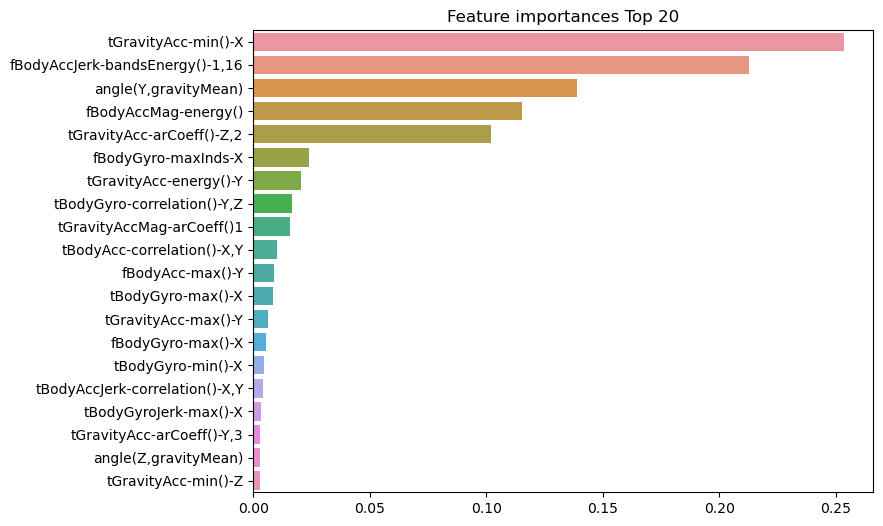

In [222]:
# feature importance 시각화

feature_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그리프로 쉽게 표현하기 위해 시리즈 변환
feature_importances = pd.Series(feature_importances_values, index= X_train.columns)
top_20 = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=top_20, y=top_20.index)
plt.show()

## 앙상블 모델

In [225]:
import pandas as pd

from sklearn.ensemble import VotingClassifier # 보팅 방식의 앙상블 구현을 위한 클래스
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

In [226]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [232]:
# 소프트 보팅 방식 구현

# 개별 모델 정의
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))


Voting 분류기 정확도: 0.9561


In [237]:
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{} 정확도: {:.4f}'.format(class_name, accuracy_score(y_test,pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


X_train, X_test , y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [242]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=156, n_jobs=-1)  #n_jobs=-1 설정시 모든 CPU코어에 대해서 수행
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n' , grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/Ca

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9165


In [250]:
estimator1 = grid_cv.best_estimator_ #best_estimator_는 best_params_로 학습이 완료된 객체
pred = estimator1.predict(X_test)
print('예측 정확도:{:.4f}' , accuracy_score(pred,y_test))

예측 정확도:{:.4f} 0.9110960298608755


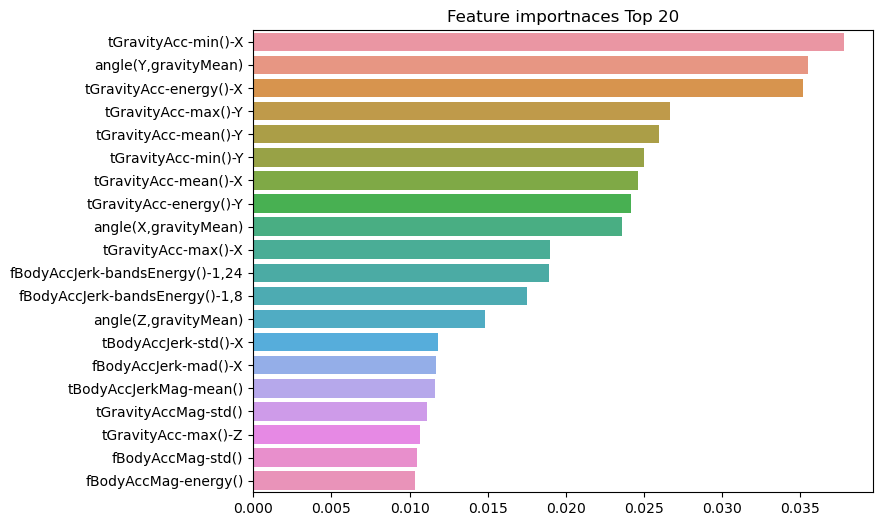

In [255]:
# 피쳐 임포턴스 시각화
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = estimator1.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=X_train.columns)
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importnaces Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()
